In [1]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Text(0, 0.5, 'Survival rate')

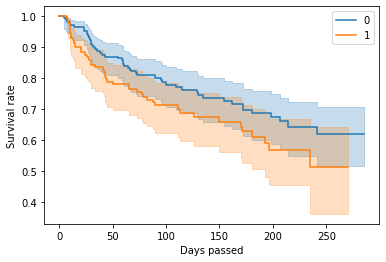

In [7]:
# KM plot for anaemia
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf_y=KaplanMeierFitter()
kmf_n=KaplanMeierFitter()

anaemia_yes = data.query("anaemia == 1")
anaemia_no = data.query("anaemia == 0")

kmf_y.fit(durations=anaemia_yes["time"], event_observed=anaemia_yes["DEATH_EVENT"], label="1")
kmf_n.fit(durations=anaemia_no["time"], event_observed=anaemia_no["DEATH_EVENT"], label="0")

kmf_n.plot()
kmf_y.plot()
plt.xlabel("Days passed")
plt.ylabel("Survival rate")

Text(0, 0.5, 'Survival rate')

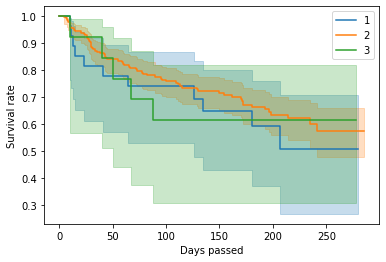

In [8]:
# KM plot for platelets
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf_l=KaplanMeierFitter()
kmf_n=KaplanMeierFitter()
kmf_h=KaplanMeierFitter()

platelets_low = data.query("platelets < 150000")
platelets_normal = data.query("platelets >= 150000 and platelets <= 450000")
platelets_high = data.query("platelets > 450000")

kmf_l.fit(durations=platelets_low["time"], event_observed=platelets_low["DEATH_EVENT"], label="1")
kmf_n.fit(durations=platelets_normal["time"], event_observed=platelets_normal["DEATH_EVENT"], label="2")
kmf_h.fit(durations=platelets_high["time"], event_observed=platelets_high["DEATH_EVENT"], label="3")

kmf_l.plot()
kmf_n.plot()
kmf_h.plot()
plt.xlabel("Days passed")
plt.ylabel("Survival rate")

Text(0, 0.5, 'Survival rate')

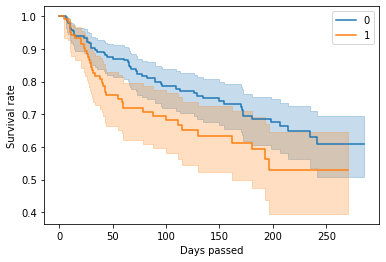

In [9]:
# KM plot for high_blood_pressure
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf_y=KaplanMeierFitter()
kmf_n=KaplanMeierFitter()

hbp_yes = data.query("high_blood_pressure == 1")
hbp_no = data.query("high_blood_pressure == 0")

kmf_y.fit(durations=hbp_yes["time"], event_observed=hbp_yes["DEATH_EVENT"], label="1")
kmf_n.fit(durations=hbp_no["time"], event_observed=hbp_no["DEATH_EVENT"], label="0")

kmf_n.plot()
kmf_y.plot()
plt.xlabel("Days passed")
plt.ylabel("Survival rate")

Text(0, 0.5, 'Survival rate')

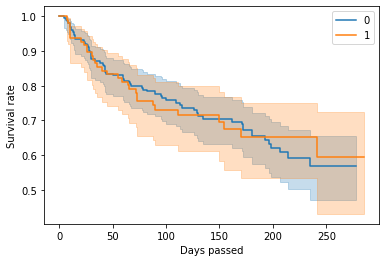

In [10]:
# KM plot for smoking
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf_y=KaplanMeierFitter()
kmf_n=KaplanMeierFitter()

smk_yes = data.query("smoking == 1")
smk_no = data.query("smoking == 0")

kmf_y.fit(durations=smk_yes["time"], event_observed=smk_yes["DEATH_EVENT"], label="1")
kmf_n.fit(durations=smk_no["time"], event_observed=smk_no["DEATH_EVENT"], label="0")

kmf_n.plot()
kmf_y.plot()
plt.xlabel("Days passed")
plt.ylabel("Survival rate")

***FEATURE SELECTION***


In [11]:
data.var()

age                         1.414865e+02
anaemia                     2.461224e-01
creatinine_phosphokinase    9.414586e+05
diabetes                    2.441023e-01
ejection_fraction           1.400635e+02
high_blood_pressure         2.286144e-01
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
sex                         2.286144e-01
smoking                     2.187156e-01
time                        6.023965e+03
DEATH_EVENT                 2.187156e-01
dtype: float64

In [12]:
#USING WRAPPER


In [13]:
#A total of 299 data
from lifelines import CoxPHFitter

In [14]:
#the summary statistics for the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [15]:
#Model Creation
cph=CoxPHFitter()

In [16]:
cph.fit(data, duration_col='time', event_col='DEATH_EVENT')

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>

In [17]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.23
         time fit was run = 2022-06-15 10:23:55 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.05       1.05       0.01             0.03             0.06                 1.03                 1.07
anaemia                    0.46       1.58       0.22             0.04             0.89                 1.04                 2.42
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diabetes                   0.14       1.15       0.22            -0.30             0.58                 0.74                 1.78
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.48       1.61       0.22             0.05             0.90                 1.05                 2.46
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.32       1.38       0.07             0.18             0.46                 1.20                 1.58
serum_sodium              -0.04       0.96       0.02            -0.09             0.00                 0.91                 1.00
sex                       -0.24       0.79       0.25            -0.73             0.26                 0.48                 1.29
smoking                    0.13       1.14       0.25            -0.36             0.62                 0.70                 1.86

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  4.98 <0.005      20.56
anaemia                      0.00  2.12   0.03       4.89
creatinine_phosphokinase     0.00  2.23   0.03       5.26
diabetes                     0.00  0.63   0.53       0.91
ejection_fraction            0.00 -4.67 <0.005      18.35
high_blood_pressure          0.00  2.20   0.03       5.17
platelets                    0.00 -0.41   0.68       0.56
serum_creatinine             0.00  4.58 <0.005      17.68
serum_sodium                 0.00 -1.90   0.06       4.12
sex                          0.00 -0.94   0.35       1.53
smoking                      0.00  0.51   0.61       0.72
---
Concordance = 0.74
Partial AIC = 958.46
log-likelihood ratio test = 81.95 on 11 df
-log2(p) of ll-ratio test = 40.56

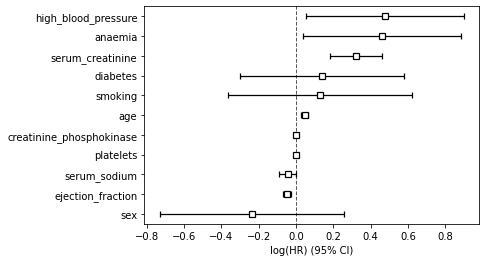

In [18]:
#plotting the individual risk factors
cph.plot()

In [19]:
#The most common way to meassure the performance of a Cox model is to use the *Concordance index* or **C-index.** 
#The C-index for a survival model can be thought of as the weighted average of the area under 
#time-specific Receiver Operating Characteristic (ROC) curves.
cph.print_summary(columns=["coef","exp(coef)","exp(coef) lower 95%","exp(coef) upper 95%", "z", "p"])

/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns
/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns


<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.23
         time fit was run = 2022-06-15 10:23:55 UTC

---
                           coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%     z      p
covariate                                                                                        
age                        0.05       1.05                 1.03                 1.07  4.98 <0.005
anaemia                    0.46       1.58                 1.04                 2.42  2.12   0.03
creatinine_phosphokinase   0.00       1.00                 1.00                 1.00  2.23   0.03
diabetes                   0.14       1.15                 0.74                 1.78  0.63   0.53
ejection_fraction         -0.05       0.95                 0.93                 0.97 -4.67 <0.005
high_blood_pressure        0.48       1.61                 1.05                 2.46  2.20   0.03
platelets                 -0.00       1.00                 1.00                 1.00 -0.41   0.68
serum_creatinine           0.32       1.38                 1.20                 1.58  4.58 <0.005
serum_sodium              -0.04       0.96                 0.91                 1.00 -1.90   0.06
sex                       -0.24       0.79                 0.48                 1.29 -0.94   0.35
smoking                    0.13       1.14                 0.70                 1.86  0.51   0.61
---
Concordance = 0.74
Partial AIC = 958.46
log-likelihood ratio test = 81.95 on 11 df
-log2(p) of ll-ratio test = 40.56

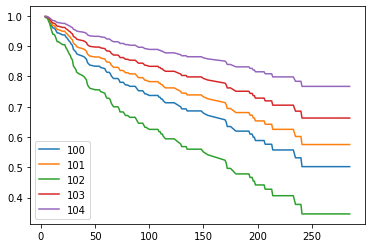

In [20]:
#A survival model will allow us to etimate how likely a person is to survive or die over time. 
#As an example, we well plot the expeted survival fuction for individual #66 and #3 in the dataset
cph.predict_survival_function(data.iloc[100:105,:]).plot()


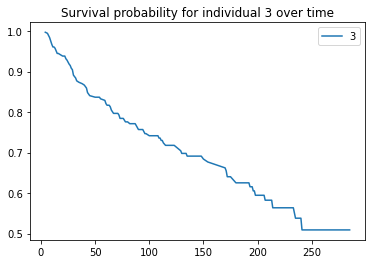

In [21]:
cph.predict_survival_function(data.loc[3]).plot(title="Survival probability for individual 3 over time")

In [22]:
#Both of them have kind of similar chance of survivng

In [23]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [26]:
#Getting the unique values of "DEATH_EVENT" column
print(list(data['DEATH_EVENT'].unique()))

[1, 0]


In [27]:
#***** For "DEATH_EVENT" 1-dead & 0-alive ******

In [28]:
# Adding an auxiliary data label for visualization purposes
#data['Label'] = ''

#data.loc[data['DEATH_EVENT'] == 0, 'Label'] = 'Survived'
#data.loc[data['DEATH_EVENT'] == 1, 'Label'] = 'Dead'

# Observing first 10 samples
#data.head(10)

In [29]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [31]:
print(data.shape)

(299, 13)


In [32]:
# Handling missed values
# Now, we can check if the data has null values or not:

data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

From the above cells, we can see, ***the data has no missed values.***

It is also abvious that we do not have ***object type (non-numric) features***. Therefore, there is no need to perform ***data type transformation and imputation techniques*** to transfom non-numeric (categorial) features into numerical values.

In [33]:
pd.set_option("display.precision", 2) # to decrease the display precision to 2 digits
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


Different primary insights can be obtained from the above table. For example:

>* The age range of the patients is [40, 95] and the average age is 60.83.
>* The mean average of the sex attribute (0.65) reveals that most of paitients are male.
>* Also, the mean average of smoking and target attribute show only 32% of patients have smoking problem and the death rate of patients is also 32%.

# **Checking data redundancies**


In [34]:
data.duplicated().any()

False

In [35]:
#Age, serum sodium, serum creatinine, gender, smoking, Blood Pressure (BP), Ejection Fraction (EF), anemia, platelets, 
#Creatinine Phosphokinase (CPK) and diabetes were considered as potential variables explaining mortality caused by CHD.
#Age, serum sodium and CPK are continuous variables whereas EF, serum creatinine and platelets were taken as categorical variables.
#EF was divided into three levels (i.e. EF<=30, 30<EF<=45 and EF>45).
#Platelets was also divided into three levels on the basis of quartiles.
#Serum creatinine greater than its normal level (>1.5) is an indicator of renal dysfunction that affects mortality rate of the heart failure.
#Anaemia in patients was assessed by their haematocrit level as patients with haematocrit less than 36 (minimum normal level of haematocrit) were taken as anemic.

In [36]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [37]:
#First dropping the'diabetes' column 
data1=data.drop(['diabetes'], axis=1) #axis=1 means axis='columns'
data1.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [39]:
cph.fit(data1, duration_col='time', event_col='DEATH_EVENT')

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>

In [40]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.42
         time fit was run = 2022-06-15 10:23:56 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.04       1.05       0.01             0.03             0.06                 1.03                 1.06
anaemia                    0.47       1.60       0.22             0.04             0.89                 1.04                 2.44
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.48       1.61       0.22             0.06             0.90                 1.06                 2.47
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.31       1.37       0.07             0.18             0.45                 1.19                 1.56
serum_sodium              -0.05       0.95       0.02            -0.09            -0.00                 0.91                 1.00
sex                       -0.24       0.78       0.25            -0.74             0.25                 0.48                 1.28
smoking                    0.12       1.13       0.25            -0.37             0.61                 0.69                 1.84

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  5.00 <0.005      20.70
anaemia                      0.00  2.15   0.03       4.99
creatinine_phosphokinase     0.00  2.21   0.03       5.20
ejection_fraction            0.00 -4.67 <0.005      18.37
high_blood_pressure          0.00  2.22   0.03       5.22
platelets                    0.00 -0.37   0.71       0.49
serum_creatinine             0.00  4.53 <0.005      17.36
serum_sodium                 0.00 -2.00   0.05       4.45
sex                          0.00 -0.97   0.33       1.60
smoking                      0.00  0.47   0.64       0.65
---
Concordance = 0.74
Partial AIC = 956.85
log-likelihood ratio test = 81.56 on 10 df
-log2(p) of ll-ratio test = 41.88

In [41]:
# The above cell doesn't show much significant changes as to when all the columns were considered 
#The C-index including 'diabetes' feature was 0.741(74%) whereas excluding 'diabetes' also gives 0.74(74%) C-index
#Therefore 'diabetes' is not a significant feature

In [42]:
#Now dropping the'diabetes' as well as 'ejection_fraction' column 
data2=data1.drop(['ejection_fraction'], axis=1) #axis=1 means axis='columns'
data2.head()

,age,anaemia,creatinine_phosphokinase,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,0,327000.00,2.7,116,0,0,8,1


In [43]:
cph.fit(data2, duration_col='time', event_col='DEATH_EVENT')

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>

In [44]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -480.59
         time fit was run = 2022-06-15 10:23:56 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.04       1.04       0.01             0.02             0.06                 1.03                 1.06
anaemia                    0.38       1.47       0.22            -0.04             0.81                 0.96                 2.25
creatinine_phosphokinase   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
high_blood_pressure        0.48       1.62       0.22             0.05             0.91                 1.06                 2.47
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.24       1.28       0.06             0.13             0.36                 1.14                 1.44
serum_sodium              -0.07       0.93       0.02            -0.11            -0.03                 0.90                 0.97
sex                       -0.05       0.95       0.25            -0.53             0.43                 0.59                 1.54
smoking                    0.15       1.16       0.25            -0.35             0.64                 0.71                 1.90

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  4.76 <0.005      18.98
anaemia                      0.00  1.76   0.08       3.68
creatinine_phosphokinase     0.00  1.96   0.05       4.31
high_blood_pressure          0.00  2.21   0.03       5.21
platelets                    0.00 -0.32   0.75       0.42
serum_creatinine             0.00  4.06 <0.005      14.33
serum_sodium                 0.00 -3.24 <0.005       9.72
sex                          0.00 -0.20   0.84       0.25
smoking                      0.00  0.58   0.56       0.84
---
Concordance = 0.71
Partial AIC = 979.18
log-likelihood ratio test = 57.23 on 9 df
-log2(p) of ll-ratio test = 27.71

In [45]:
#The above cell shows some significant changes as to when all the columns were considered 
#The C-index including 'ejection_fraction' and 'diabetes' features was 0.741(74%) whereas excluding 'diabetes' and 'ejection_fraction' gives 0.71(71%) C-index
#Therefore 'ejection_fraction' is a significant feature

In [46]:
#Now dropping the'diabetes', 'ejection_fraction' as well as 'anaemia' columns 
data3=data2.drop(['anaemia'], axis=1) #axis=1 means axis='columns'
data3.head()

,age,creatinine_phosphokinase,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,582,1,265000.00,1.9,130,1,0,4,1
1,55.0,7861,0,263358.03,1.1,136,1,0,6,1
2,65.0,146,0,162000.00,1.3,129,1,1,7,1
3,50.0,111,0,210000.00,1.9,137,1,0,7,1
4,65.0,160,0,327000.00,2.7,116,0,0,8,1


In [47]:
cph.fit(data3, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -482.13
         time fit was run = 2022-06-15 10:23:57 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
creatinine_phosphokinase   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
high_blood_pressure        0.50       1.64       0.22             0.07             0.92                 1.07                 2.51
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.26       1.30       0.06             0.14             0.38                 1.16                 1.47
serum_sodium              -0.06       0.94       0.02            -0.10            -0.02                 0.90                 0.98
sex                       -0.03       0.97       0.25            -0.51             0.46                 0.60                 1.58
smoking                    0.11       1.11       0.25            -0.39             0.60                 0.68                 1.82

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  4.80 <0.005      19.30
creatinine_phosphokinase     0.00  1.66   0.10       3.35
high_blood_pressure          0.00  2.28   0.02       5.48
platelets                    0.00 -0.25   0.80       0.32
serum_creatinine             0.00  4.34 <0.005      16.09
serum_sodium                 0.00 -3.00 <0.005       8.56
sex                          0.00 -0.11   0.91       0.13
smoking                      0.00  0.42   0.67       0.57
---
Concordance = 0.70
Partial AIC = 980.27
log-likelihood ratio test = 54.14 on 8 df
-log2(p) of ll-ratio test = 27.20

In [48]:
#C-index=70%

In [49]:
#Now dropping the'diabetes', 'ejection_fraction', 'high_blood_pressure' as well as 'anaemia' columns 
data4=data3.drop(['high_blood_pressure'], axis=1) #axis=1 means axis='columns'
data4.head()

,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,582,265000.00,1.9,130,1,0,4,1
1,55.0,7861,263358.03,1.1,136,1,0,6,1
2,65.0,146,162000.00,1.3,129,1,1,7,1
3,50.0,111,210000.00,1.9,137,1,0,7,1
4,65.0,160,327000.00,2.7,116,0,0,8,1


In [50]:
cph.fit(data4, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -484.66
         time fit was run = 2022-06-15 10:23:57 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
creatinine_phosphokinase   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.28       1.32       0.06             0.16             0.40                 1.17                 1.49
serum_sodium              -0.06       0.95       0.02            -0.10            -0.02                 0.91                 0.98
sex                       -0.06       0.94       0.25            -0.54             0.42                 0.58                 1.53
smoking                    0.09       1.09       0.25            -0.41             0.58                 0.67                 1.79

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  4.76 <0.005      18.97
creatinine_phosphokinase     0.00  1.38   0.17       2.58
platelets                    0.00 -0.22   0.83       0.28
serum_creatinine             0.00  4.50 <0.005      17.16
serum_sodium                 0.00 -2.77   0.01       7.47
sex                          0.00 -0.25   0.80       0.31
smoking                      0.00  0.35   0.73       0.45
---
Concordance = 0.69
Partial AIC = 983.32
log-likelihood ratio test = 49.09 on 7 df
-log2(p) of ll-ratio test = 25.45

In [51]:
#C-index=69%

In [52]:
#Now dropping the'diabetes', 'ejection_fraction', 'high_blood_pressure', 'Age', 'serum_creatinine'(renal dysfunction) as well as 'anaemia' columns 
data5=data4.drop(['age','serum_creatinine'], axis=1) #axis=1 means axis='columns'
data5.head()

,creatinine_phosphokinase,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT
0,582,265000.00,130,1,0,4,1
1,7861,263358.03,136,1,0,6,1
2,146,162000.00,129,1,1,7,1
3,111,210000.00,137,1,0,7,1
4,160,327000.00,116,0,0,8,1


In [53]:
cph.fit(data5, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -503.16
         time fit was run = 2022-06-15 10:23:57 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
creatinine_phosphokinase   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_sodium              -0.07       0.93       0.02            -0.11            -0.03                 0.90                 0.97
sex                       -0.02       0.98       0.25            -0.50             0.46                 0.61                 1.59
smoking                   -0.04       0.96       0.25            -0.53             0.45                 0.59                 1.57

                           cmp to     z      p   -log2(p)
covariate                                                
creatinine_phosphokinase     0.00  1.35   0.18       2.50
platelets                    0.00 -0.59   0.56       0.84
serum_sodium                 0.00 -3.49 <0.005      11.02
sex                          0.00 -0.08   0.94       0.09
smoking                      0.00 -0.15   0.88       0.19
---
Concordance = 0.58
Partial AIC = 1016.32
log-likelihood ratio test = 12.09 on 5 df
-log2(p) of ll-ratio test = 4.90

In [54]:
#C-index=58%
#Therefore we can say that 'age' and 'serum_creatinine' are the major features also including 'blood pressure', 
#'ejection fraction' and 'anemia' were found as significant risk factors for mortality among heart failure patients.
#Since, C-index reduces significantly. So, we need to keep them.
#our data frame 'data1' was including all of the above features and only excluding 'diabetes' feature

In [55]:
data1.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,20,0,327000.00,2.7,116,0,0,8,1


In [56]:
#Now dropping the'diabetes' as well as 'serum_sodium' columns
data6=data1.drop(['serum_sodium'], axis=1) #axis=1 means axis='columns'
data6.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,20,1,265000.00,1.9,1,0,4,1
1,55.0,0,7861,38,0,263358.03,1.1,1,0,6,1
2,65.0,0,146,20,0,162000.00,1.3,1,1,7,1
3,50.0,1,111,20,0,210000.00,1.9,1,0,7,1
4,65.0,1,160,20,0,327000.00,2.7,0,0,8,1


In [57]:
cph.fit(data6, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -470.28
         time fit was run = 2022-06-15 10:23:57 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.04       1.05       0.01             0.03             0.06                 1.03                 1.06
anaemia                    0.41       1.50       0.21            -0.01             0.82                 0.99                 2.28
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.45       1.57       0.22             0.03             0.88                 1.03                 2.40
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.35       1.41       0.07             0.22             0.47                 1.24                 1.61
sex                       -0.22       0.80       0.25            -0.71             0.28                 0.49                 1.32
smoking                    0.10       1.10       0.25            -0.40             0.59                 0.67                 1.80

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  4.98 <0.005      20.59
anaemia                      0.00  1.90   0.06       4.11
creatinine_phosphokinase     0.00  2.05   0.04       4.64
ejection_fraction            0.00 -5.18 <0.005      22.10
high_blood_pressure          0.00  2.11   0.04       4.83
platelets                    0.00 -0.48   0.63       0.66
serum_creatinine             0.00  5.28 <0.005      22.89
sex                          0.00 -0.87   0.39       1.37
smoking                      0.00  0.38   0.70       0.51
---
Concordance = 0.74
Partial AIC = 958.56
log-likelihood ratio test = 77.85 on 9 df
-log2(p) of ll-ratio test = 41.08

In [58]:
#C-index=74% same....diabetes,serum_sodium-not significant

In [59]:
#Now dropping the'diabetes', 'serum_sodium', 'smoking' columns
data7=data6.drop(['smoking'], axis=1) #axis=1 means axis='columns
data7.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,sex,time,DEATH_EVENT
0,75.0,0,582,20,1,265000.00,1.9,1,4,1
1,55.0,0,7861,38,0,263358.03,1.1,1,6,1
2,65.0,0,146,20,0,162000.00,1.3,1,7,1
3,50.0,1,111,20,0,210000.00,1.9,1,7,1
4,65.0,1,160,20,0,327000.00,2.7,0,8,1


In [60]:
cph.fit(data7, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -470.35
         time fit was run = 2022-06-15 10:23:58 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.04       1.05       0.01             0.03             0.06                 1.03                 1.06
anaemia                    0.40       1.49       0.21            -0.02             0.82                 0.98                 2.26
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.45       1.58       0.21             0.03             0.88                 1.03                 2.40
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.35       1.41       0.07             0.22             0.48                 1.24                 1.61
sex                       -0.18       0.84       0.23            -0.62             0.27                 0.54                 1.30

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  4.98 <0.005      20.56
anaemia                      0.00  1.87   0.06       4.03
creatinine_phosphokinase     0.00  2.06   0.04       4.65
ejection_fraction            0.00 -5.19 <0.005      22.22
high_blood_pressure          0.00  2.12   0.03       4.86
platelets                    0.00 -0.43   0.67       0.58
serum_creatinine             0.00  5.26 <0.005      22.72
sex                          0.00 -0.78   0.43       1.21
---
Concordance = 0.74
Partial AIC = 956.70
log-likelihood ratio test = 77.71 on 8 df
-log2(p) of ll-ratio test = 42.69

In [61]:
#C-index=74% same....diabetes,serum_sodium,smoking-not significant

In [62]:
#Now dropping the'diabetes', 'serum_sodium', 'smoking', 'sex' columns
data8=data7.drop(['sex'], axis=1) #axis=1 means axis='columns
data8.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,time,DEATH_EVENT
0,75.0,0,582,20,1,265000.00,1.9,4,1
1,55.0,0,7861,38,0,263358.03,1.1,6,1
2,65.0,0,146,20,0,162000.00,1.3,7,1
3,50.0,1,111,20,0,210000.00,1.9,7,1
4,65.0,1,160,20,0,327000.00,2.7,8,1


In [63]:
cph.fit(data8, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -470.65
         time fit was run = 2022-06-15 10:23:58 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
anaemia                    0.39       1.48       0.21            -0.02             0.81                 0.98                 2.25
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.47       1.60       0.21             0.05             0.89                 1.05                 2.44
platelets                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.35       1.41       0.07             0.22             0.48                 1.24                 1.61

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  4.92 <0.005      20.13
anaemia                      0.00  1.85   0.06       3.96
creatinine_phosphokinase     0.00  1.99   0.05       4.44
ejection_fraction            0.00 -5.15 <0.005      21.87
high_blood_pressure          0.00  2.21   0.03       5.20
platelets                    0.00 -0.29   0.77       0.38
serum_creatinine             0.00  5.24 <0.005      22.58
---
Concordance = 0.74
Partial AIC = 955.31
log-likelihood ratio test = 77.10 on 7 df
-log2(p) of ll-ratio test = 44.09

In [64]:
#C-index=74% same....diabetes,serum_sodium,smoking,sex-not significant

In [65]:
#Now dropping the'diabetes', 'serum_sodium', 'smoking', 'sex', 'creatinine_phosphokinase' columns
data9=data8.drop(['creatinine_phosphokinase'], axis=1) #axis=1 means axis='columns
data9.head()

,age,anaemia,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,time,DEATH_EVENT
0,75.0,0,20,1,265000.00,1.9,4,1
1,55.0,0,38,0,263358.03,1.1,6,1
2,65.0,0,20,0,162000.00,1.3,7,1
3,50.0,1,20,0,210000.00,1.9,7,1
4,65.0,1,20,0,327000.00,2.7,8,1


In [66]:
cph.fit(data9, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -472.25
         time fit was run = 2022-06-15 10:23:58 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
age                   0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
anaemia               0.33       1.40       0.21            -0.07             0.74                 0.93                 2.10
ejection_fraction    -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure   0.45       1.57       0.21             0.04             0.87                 1.04                 2.39
platelets            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine      0.34       1.40       0.07             0.21             0.47                 1.23                 1.60

                      cmp to     z      p   -log2(p)
covariate                                           
age                     0.00  4.83 <0.005      19.48
anaemia                 0.00  1.60   0.11       3.20
ejection_fraction       0.00 -5.10 <0.005      21.49
high_blood_pressure     0.00  2.13   0.03       4.91
platelets               0.00 -0.28   0.78       0.37
serum_creatinine        0.00  5.07 <0.005      21.30
---
Concordance = 0.73
Partial AIC = 956.50
log-likelihood ratio test = 73.91 on 6 df
-log2(p) of ll-ratio test = 43.82

In [67]:
#C-index=73%.......diabetes,serum_sodium,smoking,sex-not significant, creatinine_phosphokinase-significant 

In [68]:
#Now dropping the'diabetes', 'serum_sodium', 'smoking', 'sex', 'creatinine_phosphokinase', 'platelets' columns
data10=data9.drop(['platelets'], axis=1) #axis=1 means axis='columns
data10.head()

,age,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine,time,DEATH_EVENT
0,75.0,0,20,1,1.9,4,1
1,55.0,0,38,0,1.1,6,1
2,65.0,0,20,0,1.3,7,1
3,50.0,1,20,0,1.9,7,1
4,65.0,1,20,0,2.7,8,1


In [69]:
cph.fit(data10, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -472.29
         time fit was run = 2022-06-15 10:23:58 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
age                   0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
anaemia               0.33       1.39       0.21            -0.08             0.74                 0.93                 2.10
ejection_fraction    -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure   0.45       1.57       0.21             0.03             0.87                 1.03                 2.38
serum_creatinine      0.34       1.40       0.07             0.21             0.47                 1.23                 1.60

                      cmp to     z      p   -log2(p)
covariate                                           
age                     0.00  4.84 <0.005      19.56
anaemia                 0.00  1.60   0.11       3.18
ejection_fraction       0.00 -5.10 <0.005      21.52
high_blood_pressure     0.00  2.11   0.03       4.86
serum_creatinine        0.00  5.15 <0.005      21.89
---
Concordance = 0.73
Partial AIC = 954.58
log-likelihood ratio test = 73.83 on 5 df
-log2(p) of ll-ratio test = 45.80

In [70]:
#C-index=73%.......diabetes,serum_sodium,smoking,sex-not significant, creatinine_phosphokinase/platelets-significant 

In [71]:
#So, we run the cox fitter model on features-'age', 'serum_creatinine', 'high_blood_pressure', 'ejection_fraction', 'anemia' and 'creatinine_phosphokinase'
data11=data8.drop(['platelets'], axis=1) #axis=1 means axis='columns
data11.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,time,DEATH_EVENT
0,75.0,0,582,20,1,1.9,4,1
1,55.0,0,7861,38,0,1.1,6,1
2,65.0,0,146,20,0,1.3,7,1
3,50.0,1,111,20,0,1.9,7,1
4,65.0,1,160,20,0,2.7,8,1


In [72]:
cph.fit(data11, duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -470.70
         time fit was run = 2022-06-15 10:23:58 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
anaemia                    0.39       1.48       0.21            -0.02             0.81                 0.98                 2.25
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.93                 0.97
high_blood_pressure        0.47       1.59       0.21             0.05             0.88                 1.05                 2.42
serum_creatinine           0.35       1.42       0.07             0.22             0.48                 1.25                 1.61

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  4.93 <0.005      20.18
anaemia                      0.00  1.85   0.06       3.95
creatinine_phosphokinase     0.00  1.99   0.05       4.44
ejection_fraction            0.00 -5.15 <0.005      21.89
high_blood_pressure          0.00  2.19   0.03       5.14
serum_creatinine             0.00  5.32 <0.005      23.19
---
Concordance = 0.74
Partial AIC = 953.39
log-likelihood ratio test = 77.02 on 6 df
-log2(p) of ll-ratio test = 45.95

In [73]:
#Therefore, we can conclude only including the above features instead of all the columns in the dataset reduces cost with C-index=74%

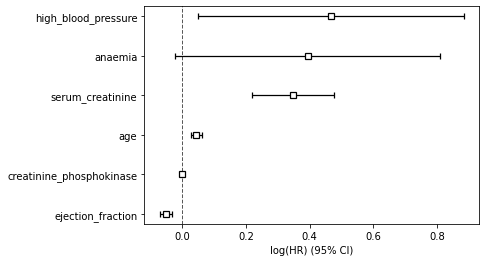

In [74]:
cph.plot()

In [82]:
print(d_data)

      age  anaemia  creatinine_phosphokinase  ejection_fraction  \
100  65.0        1                       305                 25   
101  75.0        0                       582                 45   
102  80.0        0                       898                 25   
103  42.0        0                      5209                 30   
104  60.0        0                        53                 50   

     high_blood_pressure  serum_creatinine  time  DEATH_EVENT  
100                    0              1.10    87            0  
101                    1              1.18    87            0  
102                    0              1.10    87            0  
103                    0              1.00    87            0  
104                    1              2.30    87            0  


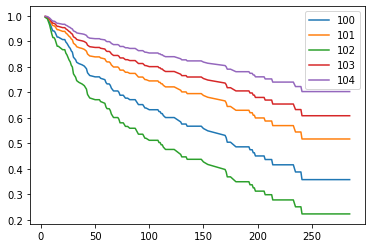

In [75]:
d_data=data11.iloc[100:105,:]
cph.predict_survival_function(d_data).plot()

**Conclusions:**


> It can be concluded that:


*   growing age,
* renal dysfunction (having serum creatinine greater than its normal level 1.5),
* high BP (higher than normal range),
* higher level of anaemia and
* lower values of ejection fraction (EF) are the key factors contributing    towards increased risk of mortality among heart failure patients.
* Increased level of serum sodium can reduce the odds of death.

* No significant differences were found due to smoking status, diabetes and gender of patients.











In [76]:
df_nz = data.copy(deep = True)
#Correlations between each of the attributes
df_nz.corr(method ='pearson')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-8.16e-02,-1.01e-01,6.01e-02,9.33e-02,-0.05,1.59e-01,-4.60e-02,6.54e-02,1.87e-02,-2.24e-01,2.54e-01
anaemia,0.09,1.00,-1.91e-01,-1.27e-02,3.16e-02,3.82e-02,-0.04,5.22e-02,4.19e-02,-9.48e-02,-1.07e-01,-1.41e-01,6.63e-02
creatinine_phosphokinase,-0.08,-0.19,1.00e+00,-9.64e-03,-4.41e-02,-7.06e-02,0.02,-1.64e-02,5.96e-02,7.98e-02,2.42e-03,-9.35e-03,6.27e-02
diabetes,-0.10,-0.01,-9.64e-03,1.00e+00,-4.85e-03,-1.27e-02,0.09,-4.70e-02,-8.96e-02,-1.58e-01,-1.47e-01,3.37e-02,-1.94e-03
ejection_fraction,0.06,0.03,-4.41e-02,-4.85e-03,1.00e+00,2.44e-02,0.07,-1.13e-02,1.76e-01,-1.48e-01,-6.73e-02,4.17e-02,-2.69e-01
high_blood_pressure,0.09,0.04,-7.06e-02,-1.27e-02,2.44e-02,1.00e+00,0.05,-4.93e-03,3.71e-02,-1.05e-01,-5.57e-02,-1.96e-01,7.94e-02
platelets,-0.05,-0.04,2.45e-02,9.22e-02,7.22e-02,5.00e-02,1.00,-4.12e-02,6.21e-02,-1.25e-01,2.82e-02,1.05e-02,-4.91e-02
serum_creatinine,0.16,0.05,-1.64e-02,-4.70e-02,-1.13e-02,-4.93e-03,-0.04,1.00e+00,-1.89e-01,6.97e-03,-2.74e-02,-1.49e-01,2.94e-01
serum_sodium,-0.05,0.04,5.96e-02,-8.96e-02,1.76e-01,3.71e-02,0.06,-1.89e-01,1.00e+00,-2.76e-02,4.81e-03,8.76e-02,-1.95e-01
sex,0.07,-0.09,7.98e-02,-1.58e-01,-1.48e-01,-1.05e-01,-0.13,6.97e-03,-2.76e-02,1.00e+00,4.46e-01,-1.56e-02,-4.32e-03


In [77]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='YlGnBu')

NameError: ignored